In [279]:
import numpy as np
import scipy
import seaborn as sns
import sklearn
import pandas as pd
# Useful for saving our models.
import pickle

# Plotting packages.
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Sets the matplotlib backend for the notebook.
# sets the backend of matplotlib to the 'inline' backend: 
# With this backend, the output of plotting commands is 
# displayed inline within the Jupyter notebook, 
# directly below the code cell that produced it
%matplotlib inline 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.metrics import root_mean_squared_error
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


print('Finished successfully loading packages')


Finished successfully loading packages


Question 1

In [281]:
df = pd.read_csv('techSalaries2017.csv')
print(df.head())

     company                         title           location  \
0     Oracle               Product Manager   Redwood City, CA   
1       eBay             Software Engineer  San Francisco, CA   
2     Amazon               Product Manager        Seattle, WA   
3      Apple  Software Engineering Manager      Sunnyvale, CA   
4  Microsoft             Software Engineer  Mountain View, CA   

   totalyearlycompensation  basesalary  stockgrantvalue    bonus  \
0                   127000      107000          20000.0  10000.0   
1                   100000           0              0.0      0.0   
2                   310000      155000              0.0      0.0   
3                   372000      157000         180000.0  35000.0   
4                   157000           0              0.0      0.0   

   yearsofexperience  yearsatcompany gender  ...  Race_Two_Or_More  \
0                1.5             1.5    NaN  ...                 0   
1                5.0             3.0    NaN  ...            

In [282]:
print(df['gender'].value_counts())

gender
Male                               35702
Female                              6999
Other                                400
Title: Senior Software Engineer        1
Name: count, dtype: int64


In [283]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

In [284]:
print(df['gender'].value_counts())

gender
1.0    35702
0.0     6999
Name: count, dtype: int64


In [285]:
numericalPredictors = ['yearsofexperience', 'yearsatcompany','gender','Age', 'Height', 'SAT', 'GPA']

In [286]:
for var in numericalPredictors:
    df_subset = df[[var, 'totalyearlycompensation']].dropna()
    X = df_subset[var].values.reshape(-1, 1)
    y = df_subset['totalyearlycompensation'].values.reshape(-1, 1)
    
    model = LinearRegression().fit(X, y)
    rSqr = model.score(X,y)
    print(var, rSqr)

yearsofexperience 0.1788267653287875
yearsatcompany 0.02749037208530003
gender 0.0022674186281936848
Age 0.06979442568855021
Height 1.9015775039044058e-06
SAT 0.1224801477004751
GPA 0.10191789745043278


In [287]:
categoricalPredictors = ['Race_Asian', 'Race_White','Race_Two_Or_More', 'Race_Black', 'Race_Hispanic']
df_cat = (df[categoricalPredictors] != 0).any(axis=1)
df_categorical = df[df_cat]

In [288]:
for var in categoricalPredictors:
    X = df_categorical[var].values.reshape(-1, 1)
    y = df_categorical['totalyearlycompensation'].values.reshape(-1, 1)
    
    model = LinearRegression().fit(X, y)
    rSqr = model.score(X,y)
    print(var,rSqr)

Race_Asian 0.0012624427779337477
Race_White 0.002259476464518295
Race_Two_Or_More 9.784890327568796e-05
Race_Black 0.00048778757274836604
Race_Hispanic 0.00019892156743006595


In [289]:
educationPredictors = ['Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 'Highschool', 'Some_College']
df_ed = (df[educationPredictors] != 0).any(axis=1)
df_education = df[df_ed]

In [290]:

for var in educationPredictors:
    X = df_education[var].values.reshape(-1, 1)
    y = df_education['totalyearlycompensation'].values.reshape(-1, 1)
    
    model = LinearRegression().fit(X, y)
    rSqr = model.score(X,y)
    print(var, rSqr)

Masters_Degree 0.01166977730160057
Bachelors_Degree 0.03238236870211031
Doctorate_Degree 0.027089375503612012
Highschool 0.0002080046611540043
Some_College 8.86125708687846e-06


In [291]:
df_none = df[df_cat & df_ed]
print(df_none.shape)
df_none = df_none.dropna()
print(df_none.shape)

(21681, 27)
(21483, 27)


In [292]:
df_none.head(10)

,company,title,location,totalyearlycompensation,basesalary,stockgrantvalue,bonus,yearsofexperience,yearsatcompany,gender,...,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,Age,Height,Zodiac,SAT,GPA
15710,Google,Software Engineer,"Sunnyvale, CA",400000,210000,145000.0,45000.0,5.0,5.0,1.0,...,0,0,0,Asian,PhD,45,68.891,9,1166,3.04
23532,Microsoft,Software Engineer,"Redmond, WA",136000,124000,1000.0,11000.0,3.0,2.0,1.0,...,1,0,0,Two Or More,Bachelor's Degree,24,61.454,12,1175,3.07
23533,Google,Software Engineer,"San Bruno, CA",337000,177000,125000.0,36000.0,6.0,6.0,1.0,...,0,0,0,Asian,Bachelor's Degree,25,65.455,1,1268,3.34
23534,Microsoft,Software Engineer,"Seattle, WA",222000,164000,38000.0,20000.0,4.0,4.0,1.0,...,0,0,0,Asian,Master's Degree,32,73.769,8,1070,2.75
23535,Blend,Software Engineer,"San Francisco, CA",187000,165000,22000.0,0.0,5.0,0.0,1.0,...,0,0,0,White,Bachelor's Degree,29,68.710,2,1187,3.23
23537,Amazon,Software Engineer,"Seattle, WA",310000,160000,150000.0,0.0,15.0,3.0,1.0,...,0,0,0,Asian,Bachelor's Degree,34,69.126,9,1196,3.28
23538,Chevron,Software Engineer,"Houston, TX",113000,103000,0.0,10000.0,3.0,3.0,1.0,...,0,0,1,Hispanic,Bachelor's Degree,23,66.406,2,992,2.66
23540,Amazon,Software Engineering Manager,"Seattle, WA",620000,160000,460000.0,0.0,19.0,7.0,1.0,...,0,0,0,Asian,Bachelor's Degree,58,66.824,2,1185,2.99
23541,Shopify,Software Engineer,"Toronto, ON, Canada",98000,78000,20000.0,0.0,9.0,4.0,1.0,...,0,0,0,Asian,Bachelor's Degree,27,63.777,10,991,2.92
23543,Apple,Software Engineer,"Vancouver, BC, Canada",180000,130000,30000.0,20000.0,1.0,1.0,1.0,...,0,0,0,Asian,Bachelor's Degree,31,68.474,10,978,2.74


In [293]:
predictors = ['yearsofexperience', 'yearsatcompany', 'Age', 'Height', 'SAT', 'GPA', 'gender', 
              'Race_Asian', 'Race_White','Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 
              'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 'Highschool']

In [294]:
X = df_none[predictors].values
y = df_none['totalyearlycompensation'].values.reshape(-1, 1)
model = LinearRegression().fit(X, y)
rSqr = model.score(X,y)
print("Multiple Linear Regression Model" , rSqr)

Multiple Linear Regression Model 0.26493888020592593


Inputs : [[ 5.  5. 45. ...  0.  1.  0.]
 [ 3.  2. 24. ...  1.  0.  0.]
 [ 6.  6. 25. ...  1.  0.  0.]
 ...
 [16.  2. 55. ...  0.  0.  0.]
 [22.  2. 50. ...  0.  0.  0.]
 [17.  0. 49. ...  0.  0.  0.]]
Labels : [[ 400000]
 [ 136000]
 [ 337000]
 ...
 [1605000]
 [2372000]
 [4980000]], predictions : [[281203.29047857]
 [196408.27647747]
 [227557.38448037]
 ...
 [399458.98800591]
 [472285.36437931]
 [387779.61440537]]


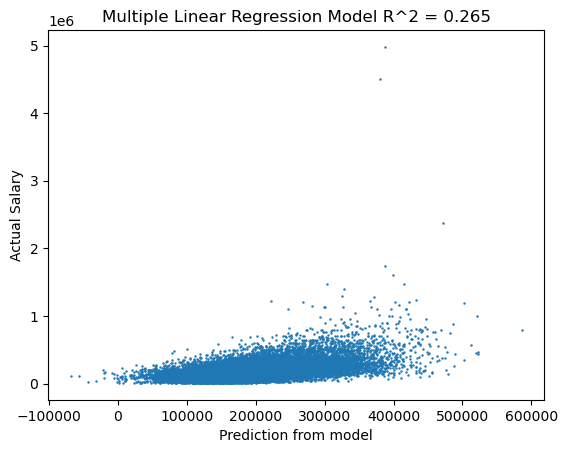

In [295]:
yHat = model.predict(X)
print("Inputs :" , X)
print(f"Labels : {y}, predictions : {yHat}")

plt.plot(yHat,y,'o',markersize=.75) 
plt.xlabel('Prediction from model') 
plt.ylabel('Actual Salary')  
plt.title('Multiple Linear Regression Model R^2 = {:.3f}'.format(rSqr))
plt.show()

yearsofexperience 0.1788267653287875
Inputs : [[ 1.5]
 [ 5. ]
 [ 8. ]
 ...
 [14. ]
 [ 8. ]
 [ 0. ]]
Labels : [[127000]
 [100000]
 [310000]
 ...
 [220000]
 [280000]
 [200000]], predictions : [[159290.4343515 ]
 [194271.16053665]
 [224254.64012392]
 ...
 [284221.59929846]
 [224254.64012392]
 [144298.69455786]]


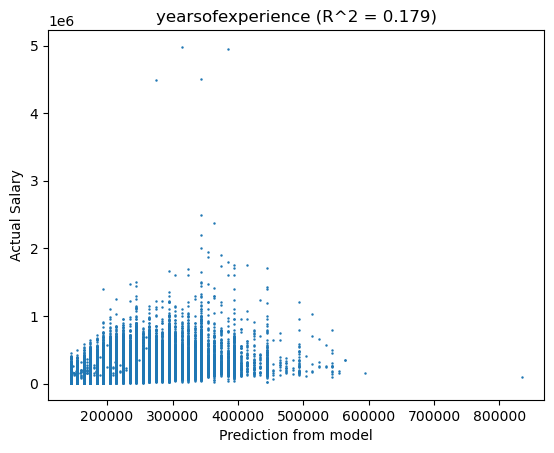

In [296]:
df_subset = df[['yearsofexperience', 'totalyearlycompensation']].dropna()
X = df_subset['yearsofexperience'].values.reshape(-1, 1)
y = df_subset['totalyearlycompensation'].values.reshape(-1, 1)

model = LinearRegression().fit(X, y)
rSqr = model.score(X,y)
print('yearsofexperience', rSqr)
yHat = model.predict(X)
print("Inputs :" , X)
print(f"Labels : {y}, predictions : {yHat}")
plt.plot(yHat,y,'o',markersize=.75) 
plt.xlabel('Prediction from model') 
plt.ylabel('Actual Salary')  
plt.title('yearsofexperience (R^2 = {:.3f})'.format(rSqr))
plt.show()

Question 2

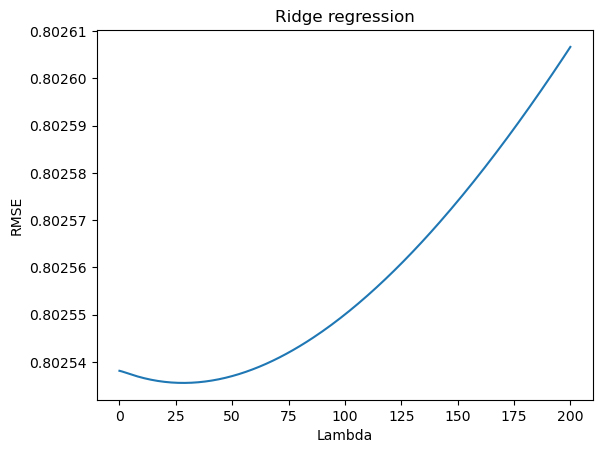

Optimal lambda: 28.00086
R-squared: 0.3006811638806247
Optimal RMSE: 0.803


In [298]:
X = df_none[predictors].values
y = df_none['totalyearlycompensation'].values.reshape(-1, 1)
x_norm = (X - np.mean(X, axis=0))/np.std(X, axis=0)
y_norm = (y - np.mean(y, axis=0))/np.std(y, axis=0)

xTrain, xTest, yTrain, yTest = train_test_split(x_norm, y_norm.reshape(-1,1), test_size=0.2, random_state=1)
lambdas = np.linspace(0.001,200,201)
cont = np.empty([len(lambdas),2])*np.NaN 

for ii in range(len(lambdas)):
    ridgeModel = Ridge(alpha=lambdas[ii]).fit(xTrain, yTrain)
    cont[ii,0] = lambdas[ii]
    #error = root_mean_squared_error(yTest,ridgeModel.predict(xTest))
    error = np.sqrt(mean_squared_error(yTest, ridgeModel.predict(xTest)))
    cont[ii,1] = error

optimal_lambda_index = np.argmin(cont[:, 1])
optimal_lambda = cont[optimal_lambda_index, 0]
optimal_rmse = cont[optimal_lambda_index, 1]

plt.plot(cont[:,0],cont[:,1])
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('Ridge regression')
plt.show()
print('Optimal lambda:',lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))])
r2 = ridgeModel.score(xTest, yTest)
print(f'R-squared: {r2}')

print(f'Optimal RMSE: {optimal_rmse:.3f}')

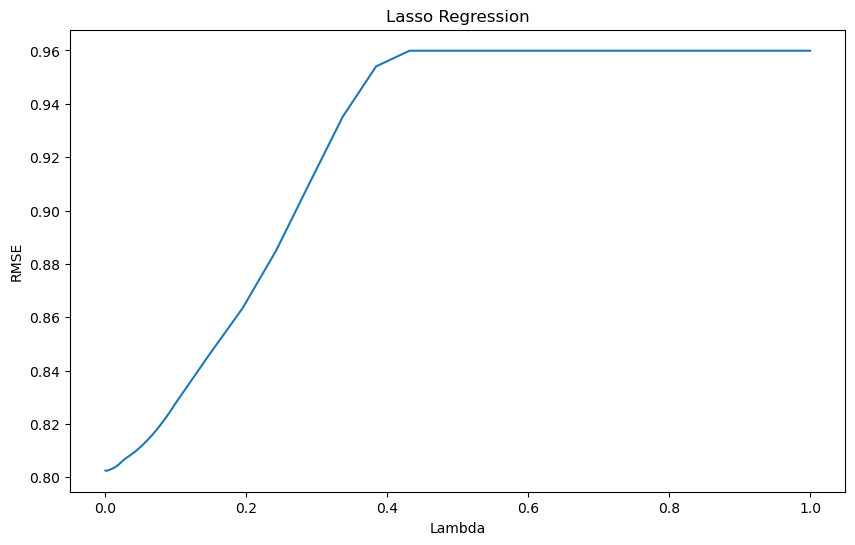

Optimal lambda: 0.0008105263157894738
R-squared: 0.30090976875915565
Optimal RMSE: 0.802
Number of coefficients shrunk to zero: 1 out of 16


In [299]:
X = df_none[predictors].values
y = df_none['totalyearlycompensation'].values.reshape(-1, 1)

x_norm = (X - np.mean(X, axis=0))/np.std(X, axis=0)
y_norm = (y - np.mean(y, axis=0))/np.std(y, axis=0)

xTrain, xTest, yTrain, yTest = train_test_split(x_norm, y_norm.reshape(-1,1), test_size=0.2, random_state=1)

lambdas = np.concatenate([
    np.linspace(0.0001, 0.001, 20), 
    np.linspace(0.001, 0.01, 20),
    np.linspace(0.01, 0.1, 20), 
    np.linspace(0.1, 1, 20) 
]) 

cont = np.empty([len(lambdas), 2]) * np.NaN  

for ii in range(len(lambdas)):
    lassoModel = Lasso(alpha=lambdas[ii], max_iter=10000).fit(xTrain, yTrain.ravel())
    cont[ii, 0] = lambdas[ii]
    error = np.sqrt(mean_squared_error(yTest, lassoModel.predict(xTest).reshape(-1, 1)))
    cont[ii, 1] = error

optimal_lambda_index = np.argmin(cont[:, 1])
optimal_lambda = cont[optimal_lambda_index, 0]
optimal_rmse = cont[optimal_lambda_index, 1]

plt.figure(figsize=(10, 6))
plt.plot(cont[:, 0], cont[:, 1])
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('Lasso Regression')
plt.show()

print('Optimal lambda:', optimal_lambda)

final_lasso = Lasso(alpha=optimal_lambda, max_iter=10000).fit(xTrain, yTrain.ravel())
r2 = final_lasso.score(xTest, yTest)
print(f'R-squared: {r2}')
print(f'Optimal RMSE: {optimal_rmse:.3f}')

coef = final_lasso.coef_
zero_coef_count = np.sum(coef == 0)
print(f'Number of coefficients shrunk to zero: {zero_coef_count} out of {len(coef)}')

Question 4

In [301]:
genderPredictors = ['totalyearlycompensation', 'basesalary', 'stockgrantvalue', 'Age', 'Height', 'SAT', 'GPA', 
                    'Race_Asian', 'Race_White','Race_Two_Or_More', 'Race_Black', 
                    'Race_Hispanic', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 
                    'Highschool', 'gender']

In [302]:
train_data, val_data = model_selection.train_test_split(df_none[genderPredictors], test_size = 0.2)

print(df_none['gender'].value_counts())

gender
1.0    17603
0.0     3880
Name: count, dtype: int64


In [303]:
X_train = train_data.drop('gender', axis = 1)
X_val  = val_data.drop('gender', axis = 1)
 
y_train = train_data['gender']
y_val  = val_data['gender']

In [304]:
model = LogisticRegression(solver = 'liblinear').fit(X_train, y_train);

Accuracy = 82.1%
Precision = 82.1%
Recall    = 100.0%


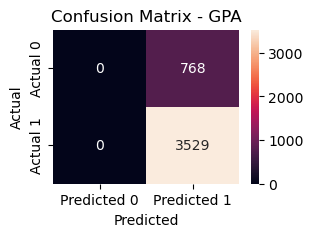

In [305]:
pred = model.predict(X_val)

accuracy = metrics.accuracy_score(y_val, pred) 
print("Accuracy = {:0.1f}%".format(accuracy * 100))

conf_matrix = metrics.confusion_matrix(y_val, pred)

precision = metrics.precision_score(y_val, pred)
print("Precision = {:0.1f}%".format(100 * precision))

recall = metrics.recall_score(y_val, pred)
print("Recall    = {:0.1f}%".format(100 * recall))

plt.figure(figsize=(3, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title(f'Confusion Matrix - {predictor}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [306]:
print(model.coef_)

[[ 1.84114343e-06 -3.24702709e-06  3.77028003e-07  5.80784736e-05
   1.03079739e-04  1.45162468e-03  4.02253731e-06  8.00964754e-07
   7.10717724e-07 -1.13109903e-08 -1.17673811e-07  1.64421263e-07
   1.11095961e-07  1.08994661e-06  9.09792194e-08  1.67397120e-07]]


Accuracy = 81.8%
Precision = 81.8%
Recall    = 100.0%


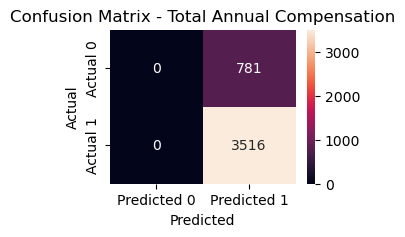

In [307]:
genderPredictors = ['totalyearlycompensation', 'gender']

train_data, val_data = model_selection.train_test_split(df_none[genderPredictors], test_size = 0.2)

X_train = train_data[['totalyearlycompensation']]  
X_val = val_data[['totalyearlycompensation']]  

y_train = train_data['gender']
y_val = val_data['gender']

model = LogisticRegression(solver = 'liblinear').fit(X_train, y_train)

pred = model.predict(X_val)

accuracy = metrics.accuracy_score(y_val, pred)
print("Accuracy = {:0.1f}%".format(accuracy * 100))

conf_matrix = metrics.confusion_matrix(y_val, pred)

precision = metrics.precision_score(y_val, pred)
print("Precision = {:0.1f}%".format(100 * precision))

recall = metrics.recall_score(y_val, pred)
print("Recall    = {:0.1f}%".format(100 * recall))

plt.figure(figsize=(3, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Total Annual Compensation')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Question 5


Logistic Regression for Predictor: yearsofexperience
Accuracy = 66.3%
Precision = 67.8%
Recall    = 61.7%
F1 Score = 0.646


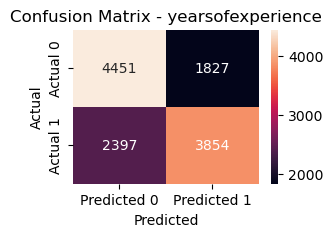


Logistic Regression for Predictor: Age
Accuracy = 58.2%
Precision = 58.3%
Recall    = 57.0%
F1 Score = 0.576


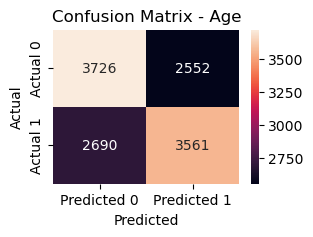


Logistic Regression for Predictor: Height
Accuracy = 50.5%
Precision = 50.7%
Recall    = 25.4%
F1 Score = 0.339


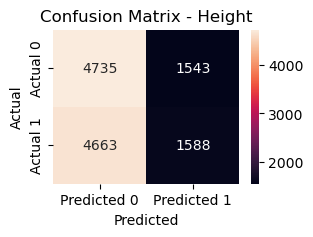


Logistic Regression for Predictor: SAT
Accuracy = 59.5%
Precision = 58.7%
Recall    = 63.3%
F1 Score = 0.609


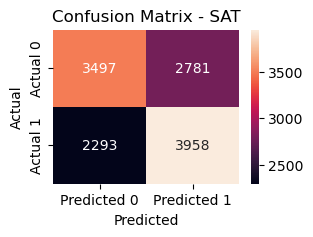


Logistic Regression for Predictor: GPA
Accuracy = 59.0%
Precision = 58.4%
Recall    = 62.4%
F1 Score = 0.603


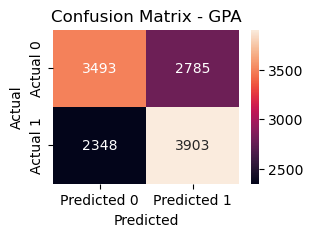

In [309]:
from sklearn.metrics import f1_score

payPredictors = ['yearsofexperience', 'Age', 'Height', 'SAT', 'GPA']

df["binaryPay"] = np.where(df["totalyearlycompensation"] > df["totalyearlycompensation"].median(), 1, 0)

for predictor in payPredictors:
    print(f"\nLogistic Regression for Predictor: {predictor}")
    
    X = df[[predictor]]
    y = df["binaryPay"]
    
    X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

    model = LogisticRegression(solver='liblinear')
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    accuracy = metrics.accuracy_score(y_val, y_pred)
    print("Accuracy = {:0.1f}%".format(accuracy * 100))
        
    conf_matrix = metrics.confusion_matrix(y_val, y_pred)
    
    precision = metrics.precision_score(y_val, y_pred)
    recall = metrics.recall_score(y_val, y_pred)
    print("Precision = {:0.1f}%".format(100 * precision))
    print("Recall    = {:0.1f}%".format(100 * recall))

    print("F1 Score = {:0.3f}".format(f1_score(y_val, y_pred)))
    
    plt.figure(figsize=(3, 2))
    sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix - {predictor}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


Extra Credit

In [311]:
variables = ['totalyearlycompensation', 'Height', 'Age']
for var in variables:
    print(f'{var}: Skewness = {df[var].skew():.4f}, Kurtosis = {df[var].kurtosis():.4f}')

totalyearlycompensation: Skewness = 4.5126, Kurtosis = 87.0021
Height: Skewness = -0.0013, Kurtosis = 0.0013
Age: Skewness = 0.2890, Kurtosis = -0.2110


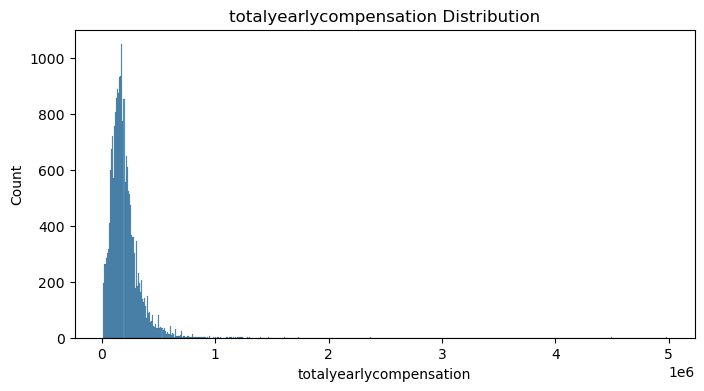

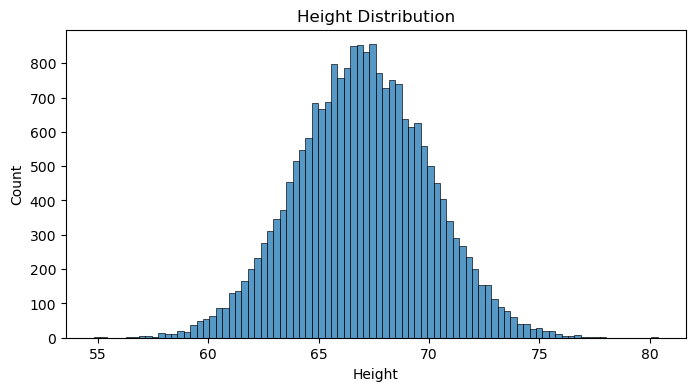

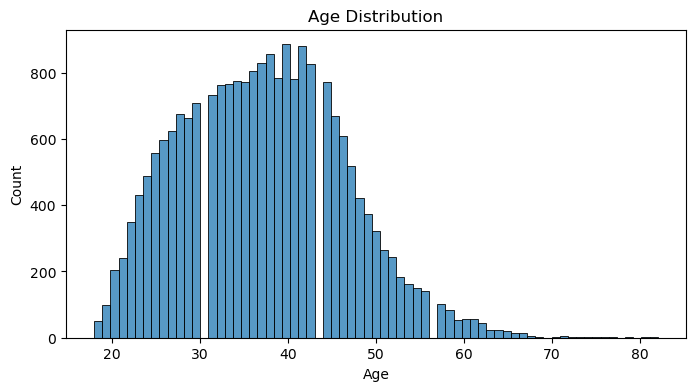

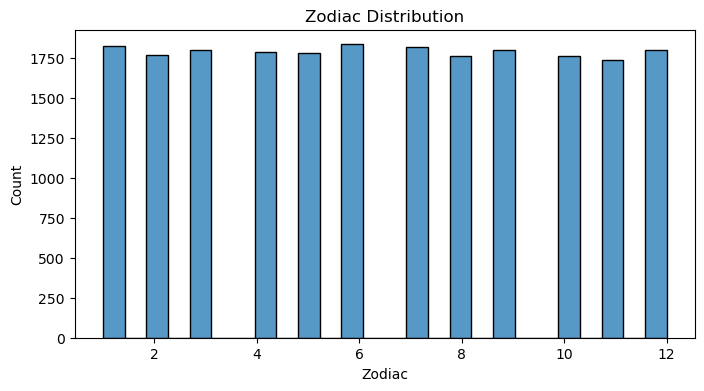

In [312]:
for feature in ['totalyearlycompensation', 'Height', 'Age', 'Zodiac']:
    data = df_none[feature].dropna()
    
    plt.figure(figsize=(8, 4))
    sns.histplot(data)
    plt.title(f'{feature} Distribution')
    plt.show()

In [313]:
df["yearsofexperience"].corr(df["totalyearlycompensation"])

0.4228791379682701

In [314]:
location_counts = df['location'].value_counts()

df_filtered = df[df['location'].isin(location_counts[location_counts > 100].index)]

average_salary = df_filtered.groupby('location')['totalyearlycompensation'].mean()

topSalaries = average_salary.nlargest(10)

bottomSalaries = average_salary.nsmallest(10)

print("Top 5 salaries:")
print(topSalaries)

print("\nBottom 5 salaries:")
print(bottomSalaries)

print("\nMax salary:", average_salary.max())
print("Min salary:", average_salary.min())


Top 5 salaries:
location
Los Gatos, CA        479185.840708
Menlo Park, CA       365924.652778
Mountain View, CA    297155.604396
Kirkland, WA         292408.284024
San Mateo, CA        289982.456140
Cupertino, CA        287428.721174
San Francisco, CA    285613.432397
Sunnyvale, CA        275128.336299
San Bruno, CA        272653.225806
Santa Monica, CA     262395.348837
Name: totalyearlycompensation, dtype: float64

Bottom 5 salaries:
location
Pune, MH, India          39535.087719
Gurgaon, HR, India       55225.806452
Hyderabad, AP, India     61564.516129
Hyderabad, TS, India     63140.394089
Moscow, MC, Russia       64280.628272
Bengaluru, KA, India     64409.523810
Bangalore, KA, India     68262.718932
Taipei, TP, Taiwan       76939.698492
Berlin, BE, Germany     106973.684211
Ottawa, ON, Canada      119425.373134
Name: totalyearlycompensation, dtype: float64

Max salary: 479185.8407079646
Min salary: 39535.087719298244
